In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS
from scipy.stats import mannwhitneyu, kruskal
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [46]:
###### loading the dataset
df = pd.read_excel(r"C:\Users\PC\Desktop\6 projects\AutoInsurance.xlsx")

In [47]:
######EDA 
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [49]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [50]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [51]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

In [56]:
relevant_columns = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 
    'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
    'Gender', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
    'Vehicle Class', 'Vehicle Size'
]


In [59]:
existing_relevant_columns = [col for col in relevant_columns if col in df.columns]
df = df[existing_relevant_columns]
df = df.dropna()


In [60]:
categorical_columns = [
    'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
    'Gender', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
    'Vehicle Class', 'Vehicle Size'
]

In [61]:
categorical_columns = [col for col in categorical_columns if col in df.columns]


In [62]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [64]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


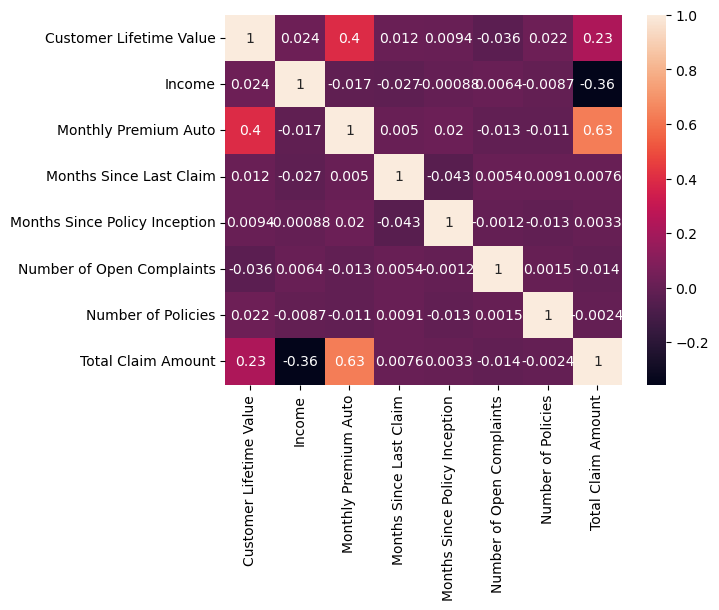

In [65]:
#correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

In [66]:
X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

In [69]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse}, R^2={r2}")


Linear Regression: RMSE=6606.818496136715, R^2=0.15302065684665622
Ridge Regression: RMSE=6606.818198350781, R^2=0.1530207331976351
Lasso Regression: RMSE=6606.812578738987, R^2=0.1530221740402644
Decision Tree: RMSE=5385.5916117655925, R^2=0.437198945655799
Random Forest: RMSE=4064.6630782303546, R^2=0.6794194484652065
AdaBoost: RMSE=5917.131125674913, R^2=0.32062360431745807


In [70]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


training and evaluation

In [72]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [73]:
best_rf = grid_search.best_estimator_

In [74]:
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Best Random Forest after further tuning: RMSE={rmse}, R^2={r2}")
print("Best Parameters:", grid_search.best_params_)

Best Random Forest after further tuning: RMSE=4045.82574564808, R^2=0.6823839692686096
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


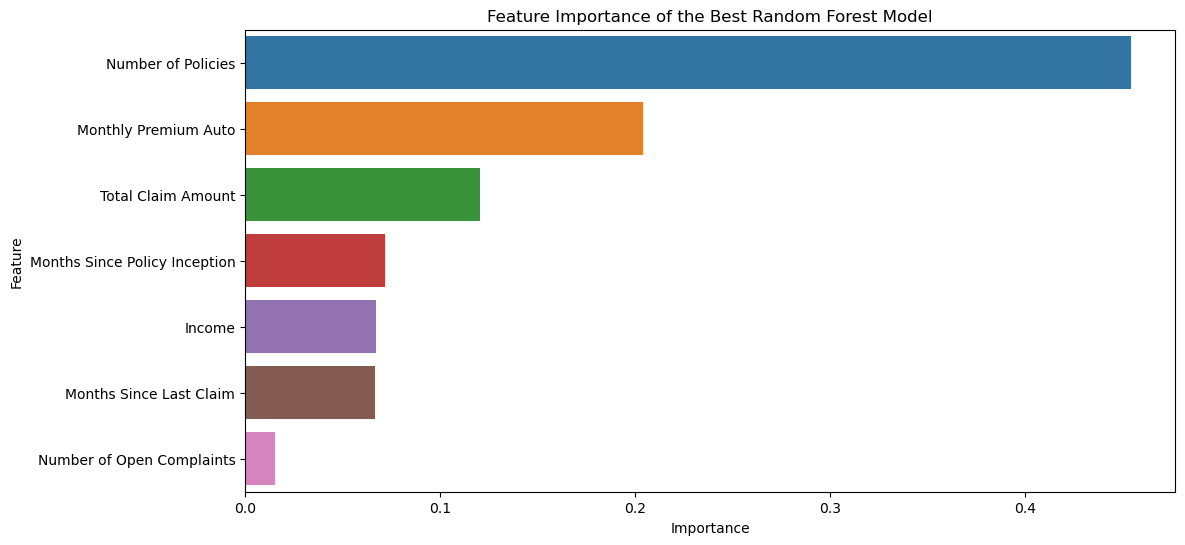

In [76]:
#importance of features

importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance of the Best Random Forest Model')
plt.show()

In [79]:
#cross validated rmse scores

rf_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
rf_rmse_scores = -rf_scores

print(f"Cross-validated RMSE scores: {rf_rmse_scores}")
print(f"Mean CV RMSE: {rf_rmse_scores.mean()}, Std Dev: {rf_rmse_scores.std()}")


Cross-validated RMSE scores: [3504.01876831 3474.93195155 3773.81903656 4211.9237567  3612.16903924]
Mean CV RMSE: 3715.3725104719792, Std Dev: 269.4854948681413


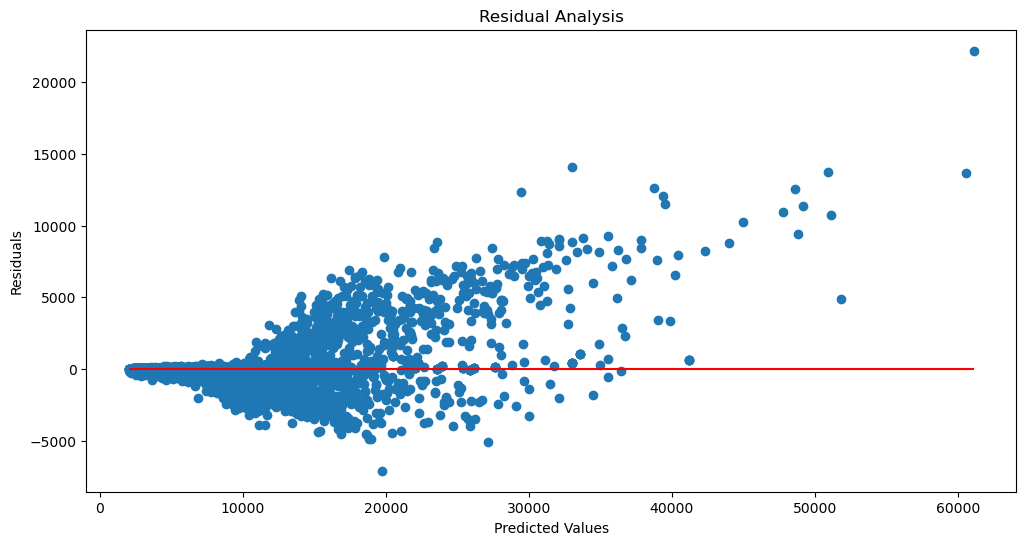

In [81]:
#residual analysis
y_train_pred = best_rf.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, residuals)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

In [85]:
##OLS 
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_features:
    X_ols = sm.add_constant(X_train[feature])
    model = sm.OLS(y_train, X_ols).fit()
    print(f"Feature: {feature}")
    print(model.summary())
    print("\n")

Feature: Income
                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     2.417
Date:                     Tue, 28 May 2024   Prob (F-statistic):              0.120
Time:                             14:08:49   Log-Likelihood:                -74839.
No. Observations:                     7307   AIC:                         1.497e+05
Df Residuals:                         7305   BIC:                         1.497e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------